# noise model
We need to implement a noise model in the forward model for `dustFM`. At the moment, I will implement the simplest thing: 
- assign uncertainties to $(G-R)$ and $(FUV-NUV)$ based on $M_r$. This is not the right thing to do, but will at least mimic the impact of uncertainties

In [1]:
import numpy as np 
import corner as DFM
from scipy.stats import chi2
# -- galpopfm --
from galpopfm.catalogs import Catalog
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
tinker = Catalog('tinker')

In [3]:
M_fuv, M_nuv, _, M_g, M_r, _, _ = tinker.data['NSA_ABSMAG'].T

In [4]:
ivar_fuv, ivar_nuv, _, ivar_g, ivar_r, _, _ = tinker.data['NSA_AMIVAR'].T

In [5]:
cut = (M_r < -20) & (M_fuv < -10) & (M_fuv > -999) & (M_nuv < -10) & (M_nuv > -999)

Text(0, 0.5, '$\\sigma_{M_r}$')

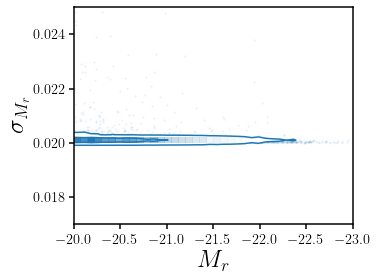

In [6]:
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(111)

DFM.hist2d(M_r[cut], ivar_r[cut]**-0.5, color='C0', 
    levels=[0.68, 0.95], range=[[-20, -23], [0.017, 0.025]], bins=40, 
    plot_datapoints=True, fill_contours=False, plot_density=True, 
    ax=sub)

sub.set_xlabel('$M_r$', fontsize=25)
sub.set_ylabel('$\sigma_{M_r}$', fontsize=25)

In [7]:
x_mr = np.linspace(0.018, 0.03, 1000)

(0.0195, 0.022)

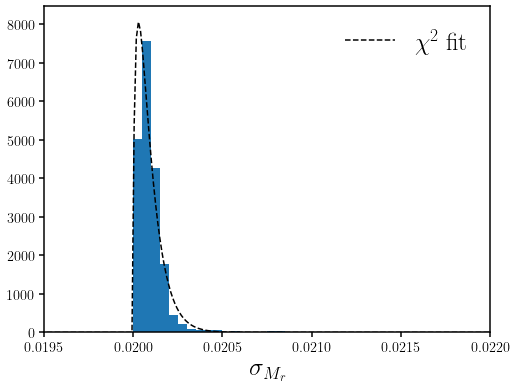

In [8]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.hist(ivar_r[cut]**-0.5, range=[0.015, 0.04], bins=500, density=True)
sub.plot(x_mr, chi2.pdf(x_mr, 3, loc=0.02, scale=0.00003), c='k', ls='--', label='$\chi^2$ fit')
sub.legend(loc='upper right', fontsize=25)
sub.set_xlabel('$\sigma_{M_r}$', fontsize=25)
sub.set_xlim(0.0195, 0.022)

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


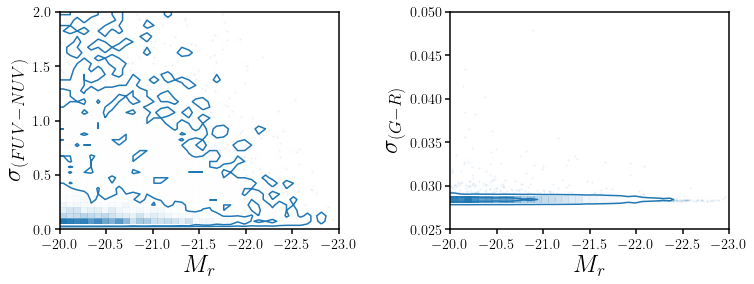

In [9]:
fig = plt.figure(figsize=(12,4))
sub = fig.add_subplot(121)

DFM.hist2d(M_r[cut], np.sqrt(1./ivar_fuv[cut] + 1./ivar_nuv[cut]), color='C0', 
    levels=[0.68, 0.95], range=[[-20, -23], [0., 2.]], bins=40, 
    plot_datapoints=True, fill_contours=False, plot_density=True, 
    ax=sub)

sub.set_xlabel('$M_r$', fontsize=25)
sub.set_ylabel('$\sigma_{(FUV-NUV)}$', fontsize=25)

sub = fig.add_subplot(122)
DFM.hist2d(M_r[cut], np.sqrt(1./ivar_g[cut] + 1./ivar_r[cut]), color='C0', 
    levels=[0.68, 0.95], range=[[-20, -23], [0.025, 0.05]], bins=40, 
    plot_datapoints=True, fill_contours=False, plot_density=True, 
    ax=sub)
sub.set_xlabel('$M_r$', fontsize=25)
sub.set_ylabel('$\sigma_{(G - R)}$', fontsize=25)

fig.subplots_adjust(wspace=0.4)

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykerne

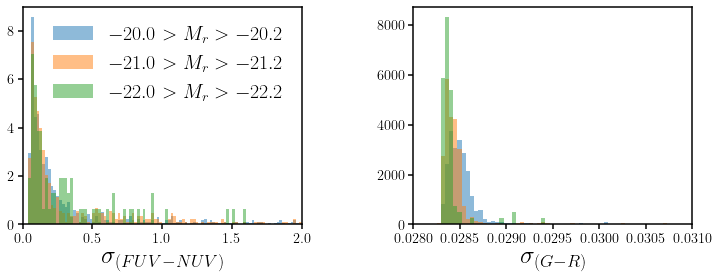

In [10]:
fig = plt.figure(figsize=(12,4))
for _mr_lim in [-20., -21., -22.]: 
    sub = fig.add_subplot(121)
    Mr_lim = ((M_r < _mr_lim) & (M_r > _mr_lim - 0.2))

    notnan = np.isfinite(np.sqrt(1./ivar_fuv + 1./ivar_nuv))
    sub.hist(np.sqrt(1./ivar_fuv + 1./ivar_nuv)[cut & Mr_lim & notnan], range=(0., 2.0), 
             bins=100, density=True, alpha=0.5, label='$%.1f > M_r > %.1f$' % (_mr_lim, _mr_lim-0.2))
    sub.set_xlabel('$\sigma_{(FUV-NUV)}$', fontsize=25)
    sub.set_xlim(0., 2.)
    sub.legend(loc='upper right', fontsize=20)
    
    notnan = np.isfinite(np.sqrt(1./ivar_g + 1./ivar_r))
    sub = fig.add_subplot(122)
    sub.hist(np.sqrt(1./ivar_g + 1./ivar_r)[cut & Mr_lim & notnan], range=(0.026, 0.035), bins=200, density=True, alpha=0.5)
    sub.set_xlabel('$\sigma_{(G - R)}$', fontsize=25)
    sub.set_xlim(0.028, 0.031)

fig.subplots_adjust(wspace=0.4)


In [11]:
x_fn = np.linspace(0., 2., 1000)
x_gr = np.linspace(0.028, 0.32, 10000)

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by z

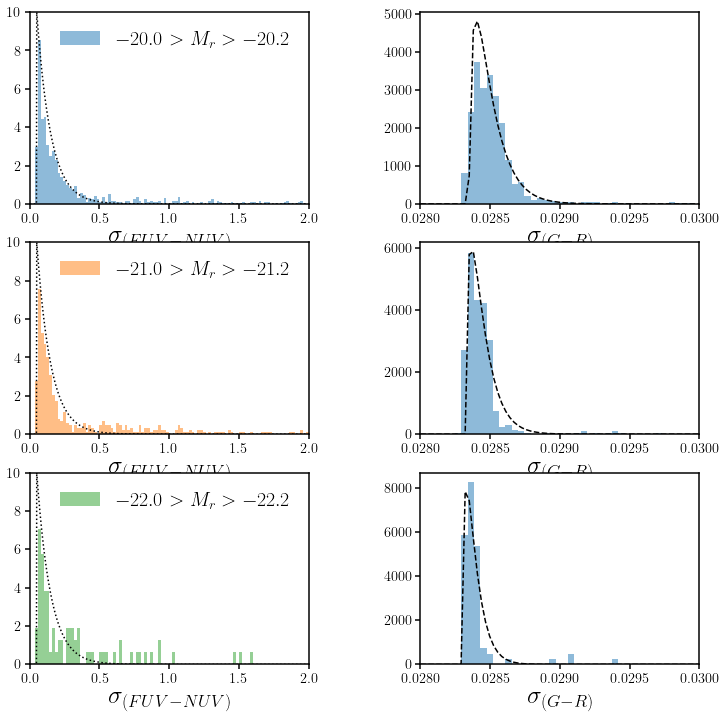

In [12]:
fig = plt.figure(figsize=(12,12))
for i, _mr_lim in enumerate([-20., -21., -22.]): 
    sub = fig.add_subplot(3,2,2*i+1)
    Mr_lim = ((M_r < _mr_lim) & (M_r > _mr_lim - 0.2))

    notnan = np.isfinite(np.sqrt(1./ivar_fuv + 1./ivar_nuv))
    sub.hist(np.sqrt(1./ivar_fuv + 1./ivar_nuv)[cut & Mr_lim & notnan], range=(0., 2.0), 
             bins=100, density=True, alpha=0.5, color='C%i' % i, label='$%.1f > M_r > %.1f$' % (_mr_lim, _mr_lim-0.2))
    sub.plot(x_fn, chi2.pdf(x_fn, 2, loc=0.05, scale=0.05), c='k', ls=':')
    sub.set_xlabel('$\sigma_{(FUV-NUV)}$', fontsize=25)
    sub.set_xlim(0., 2.)
    sub.set_ylim(0., 10.)
    sub.legend(loc='upper right', fontsize=20)
    
    notnan = np.isfinite(np.sqrt(1./ivar_g + 1./ivar_r))
    sub = fig.add_subplot(3,2,2*i+2)
    sub.hist(np.sqrt(1./ivar_g + 1./ivar_r)[cut & Mr_lim & notnan], range=(0.026, 0.035), bins=200, density=True, alpha=0.5)
    if i == 0: 
        # M_r = -20.1
        sub.plot(x_gr, chi2.pdf(x_gr, 3, loc=0.02835, scale=0.00005), c='k', ls='--')
    elif i == 1: 
        # M_r = -21.1
        sub.plot(x_gr, chi2.pdf(x_gr, 3, loc=0.028325, scale=0.00004), c='k', ls='--')
    elif i == 2: 
        # M_r = -22.1
        sub.plot(x_gr, chi2.pdf(x_gr, 3, loc=0.0283, scale=0.00003), c='k', ls='--')
    sub.set_xlabel('$\sigma_{(G - R)}$', fontsize=25)
    sub.set_xlim(0.028, 0.03)
fig.subplots_adjust(wspace=0.4)


# test noise model implementation

In [13]:
from galpopfm import dust_infer as dustInfer

In [14]:
tng_sed = dustInfer._read_sed('tng') 

In [15]:
mlim    = (tng_sed['logmstar'] > 9.4) # mass limit 
zerosfr = (tng_sed['logsfr.inst'] == -999)

cuts = mlim & ~zerosfr

In [16]:
# pass through the minimal amount of memory 
wlim = (tng_sed['wave'] > 1e3) & (tng_sed['wave'] < 8e3) 

In [17]:
sim_sed = {} 
sim_sed['sim']           = 'tng' 
sim_sed['logmstar']      = tng_sed['logmstar'][cuts].copy()
sim_sed['logsfr.inst']   = tng_sed['logsfr.inst'][cuts].copy() 
sim_sed['wave']          = tng_sed['wave'][wlim].copy()
sim_sed['sed_noneb']     = tng_sed['sed_noneb'][cuts,:][:,wlim].copy() 
sim_sed['sed_onlyneb']   = tng_sed['sed_onlyneb'][cuts,:][:,wlim].copy() 

In [18]:
# observables for SFR = 0 simulated galaxies are directly sampled from SDSS
# distribution 
zerosfr_obs = dustInfer._observable_zeroSFR(
        tng_sed['wave'][wlim], 
        tng_sed['sed_neb'][mlim & zerosfr,:][:,wlim])

In [19]:
theta = np.zeros(6) # no attenuation

x_mod_nonoise = dustInfer.sumstat_model(theta, 
                                        sed=sim_sed, 
                                        dem='slab_noll_msfr_fixbump',
                                        statistic='3d', 
                                        sfr0_prescription='sfrmin',
                                        noise=False,
                                        return_datavector=True) 
x_mod_noise = dustInfer.sumstat_model(theta, 
                                      sed=sim_sed, 
                                      dem='slab_noll_msfr_fixbump',
                                      statistic='3d', 
                                      sfr0_prescription='sfrmin',
                                      noise=True,
                                      return_datavector=True)

(-1.0, 4.0)

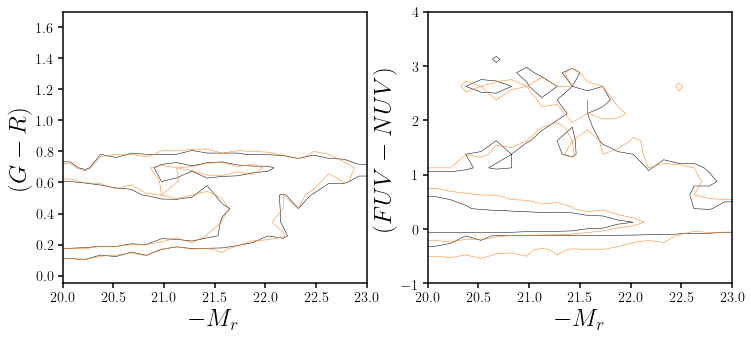

In [20]:
fig = plt.figure(figsize=(12,5))
sub = fig.add_subplot(121)
DFM.hist2d(x_mod_nonoise[0], x_mod_nonoise[1], levels=[0.68, 0.95],
        range=[(20, 23), (-0.05, 1.7)], bins=20, color='k', 
        contour_kwargs={'linewidths': 0.5}, 
        plot_datapoints=False, fill_contours=False, plot_density=False, ax=sub)

DFM.hist2d(x_mod_noise[0], x_mod_noise[1], levels=[0.68, 0.95],
        range=[(20, 23), (-0.05, 1.7)], bins=20, color='C1', 
        contour_kwargs={'linewidths': 0.5}, 
        plot_datapoints=False, fill_contours=False, plot_density=False, ax=sub)
sub.set_xlabel('$-M_r$', fontsize=25)
sub.set_xlim(20, 23)
sub.set_ylabel('$(G-R)$', fontsize=25)
sub.set_ylim(-0.05, 1.7)

sub = fig.add_subplot(122)
DFM.hist2d(x_mod_nonoise[0], x_mod_nonoise[2], levels=[0.68, 0.95],
        range=[(20, 23), (-1., 4.)], bins=20, color='k', 
        contour_kwargs={'linewidths': 0.5}, 
        plot_datapoints=False, fill_contours=False, plot_density=False, ax=sub)

DFM.hist2d(x_mod_noise[0], x_mod_noise[2], levels=[0.68, 0.95],
        range=[(20, 23), (-1., 4.)], bins=20, color='C1', 
        contour_kwargs={'linewidths': 0.5}, 
        plot_datapoints=False, fill_contours=False, plot_density=False, ax=sub)
sub.set_xlabel('$-M_r$', fontsize=25)
sub.set_xlim(20, 23)
sub.set_ylabel('$(FUV-NUV)$', fontsize=25)
sub.set_ylim(-1., 4.)

(-0.1, 0.1)

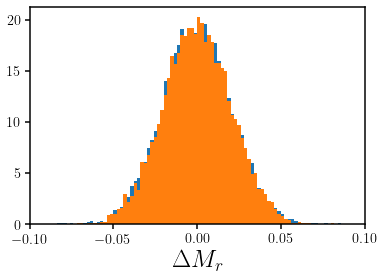

In [21]:
plt.hist(x_mod_noise[0] - x_mod_nonoise[0], range=(-0.1, 0.1), bins=100, density=True)#, range=(-4., 4.), bins=100, density=True)
plt.hist(np.random.normal(size=len(x_mod_noise[0]))*0.02, range=(-0.1, 0.1), bins=100, density=True)
plt.xlabel('$\Delta M_r$', fontsize=25)
plt.xlim(-0.1, 0.1)

(-0.2, 0.2)

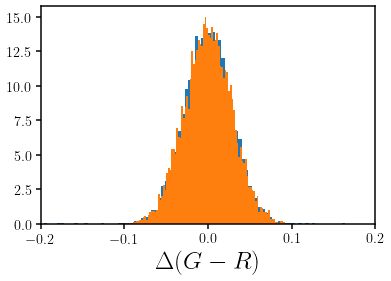

In [22]:
plt.hist(x_mod_noise[1] - x_mod_nonoise[1], range=(-0.2, 0.2), bins=100, density=True)
plt.hist(np.random.normal(size=len(x_mod_noise[0]))*0.02835, range=(-0.1, 0.1), bins=100, density=True)
plt.xlabel(r'$\Delta (G-R)$', fontsize=25)
plt.xlim(-0.2, 0.2)

(-0.2, 0.2)

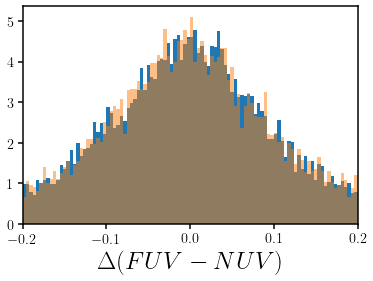

In [23]:
plt.hist(x_mod_noise[2] - x_mod_nonoise[2], range=(-0.2, 0.2), bins=100, density=True)
noise_fnuv = np.random.normal(size=len(x_mod_noise[0])) * chi2.rvs(2, loc=0.05, scale=0.05, size=len(x_mod_noise[0]))
plt.hist(noise_fnuv, range=(-0.2, 0.2), bins=100, alpha=0.5, density=True)
plt.xlabel(r'$\Delta (FUV-NUV)$', fontsize=25)
plt.xlim(-0.2, 0.2)